In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv('ADS_CSV.csv')

In [33]:
df.info() #### Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            3140 non-null   float64
 5   1961            4546 non-null   float64
 6   1962            4727 non-null   float64
 7   1963            4587 non-null   float64
 8   1964            4643 non-null   float64
 9   1965            4679 non-null   float64
 10  1966            4690 non-null   float64
 11  1967            4859 non-null   float64
 12  1968            4711 non-null   float64
 13  1969            4718 non-null   float64
 14  1970            5987 non-null   float64
 15  1971            7338 non-null   float64
 16  1972            7545 non-null   float64
 17  1973            7358 non-null  

In [34]:
df['Indicator Name'].value_counts()

Urban population (% of total population)                                                      266
CO2 intensity (kg per kg of oil equivalent energy use)                                        266
Renewable electricity output (% of total electricity output)                                  266
Electricity production from renewable sources, excluding hydroelectric (kWh)                  266
Electricity production from renewable sources, excluding hydroelectric (% of total)           266
                                                                                             ... 
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     266
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   266
Rural population living in areas where elevation is below 5 meters (% of total population)    266
Urban population living in areas where elevation is below 5 meters (% of total population)    266
Agricultural land (s

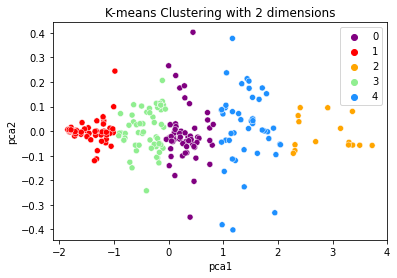

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

df_forest_area = df.loc[df['Indicator Name'] == 'Forest area (% of land area)']
df_forest_area = df_forest_area.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code','1960','1961',
                                                       '1962','1963','1964','1965','1966','1967','1968','1969','1970','1971',
                                                       '1972','1973','1974','1975','1976','1977','1978','1979','1980','1981',
                                                       '1982','1983','1984','1985','1986','1987','1988','1989'])
df_forest_area = df_forest_area.dropna(how='any')
df_forest_area = df_forest_area.reset_index(drop=True)
df_forest_area = df_forest_area.set_index('Country Name')

def f(s):
    return s/s.max()

df_new = df_forest_area.apply(f, axis=0)
clustering_kmeans = KMeans(n_clusters=5)
kmeans = clustering_kmeans.fit_predict(df_new)
#Coordinates of cluster centers with shape [n_clusters, n_features]
clustering_kmeans.fit(df_new).cluster_centers_
#Labels of each point
clustering_kmeans.fit(df_new).labels_

z=df_new[clustering_kmeans.labels_==3] #### selecting countries from cluster number 3

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_new)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=kmeans, data=results,
              palette=['purple','red','orange','lightgreen','dodgerblue'],
              legend='full',)
plt.title('K-means Clustering with 2 dimensions')
plt.savefig('kmeans.jpg')
plt.show()

In [36]:
z.reset_index(inplace = True)
print(z)
print(z.info())
z.loc[z['Country Name'] == 'Finland']

                      Country Name      1990      1991      1992      1993  \
0                   American Samoa  0.916565  0.915059  0.913553  0.912045   
1                Brunei Darussalam  0.795014  0.792123  0.789231  0.786338   
2           Caribbean small states  0.927065  0.926727  0.926388  0.926050   
3                          Finland  0.728575  0.730649  0.732724  0.734800   
4                            Gabon  0.935508  0.935489  0.935470  0.935451   
5                    Guinea-Bissau  0.805699  0.802844  0.799988  0.797131   
6                Equatorial Guinea  0.976179  0.973389  0.970598  0.967806   
7                           Guyana  0.958656  0.958690  0.958724  0.958757   
8                          Lao PDR  0.784273  0.782623  0.780972  0.779320   
9                          Liberia  0.897895  0.894921  0.891947  0.888971   
10                Papua New Guinea  0.815396  0.815319  0.815241  0.815163   
11                 Solomon Islands  0.922369  0.922325  0.922280

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,Finland,0.728575,0.730649,0.732724,0.7348,0.736877,0.738955,0.741034,0.743115,0.745196,...,0.747859,0.749453,0.751049,0.752647,0.754197,0.754758,0.755095,0.755703,0.756311,0.75692


C:\Users\vc381\AppData\Local\Temp/ipykernel_15448/3898100658.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samoa_df['Year'] = pd.to_numeric(samoa_df["Year"])


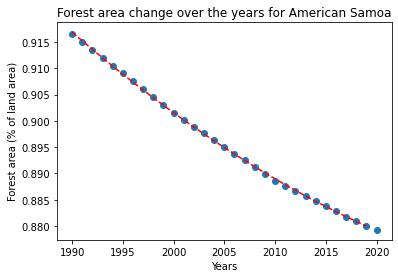

In [37]:
import seaborn as sns
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit

z_melted = z.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
z_melted
samoa_df = z_melted[z_melted["Country Name"]=="American Samoa"]
samoa_df['Year'] = pd.to_numeric(samoa_df["Year"])


# objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

x = samoa_df["Year"]
y = samoa_df["Value"] 

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarizing the parameter values
a, b,c = popt
# plot input vs output
plt.scatter(x, y)
# sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# the output for the range
y_line = objective(x_line, a, b,c)
# line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.title("Forest area change over the years for American Samoa")
plt.xlabel("Years")
plt.ylabel("Forest area (% of land area)")
plt.savefig('samoa.jpg')
plt.show()

C:\Users\vc381\AppData\Local\Temp/ipykernel_15448/168152619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finland_df['Year'] = pd.to_numeric(finland_df["Year"])


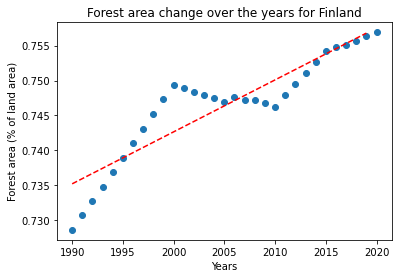

In [38]:
import numpy as np
from numpy import sin
from numpy import sqrt

finland_df = z_melted[z_melted["Country Name"]=="Finland"]
finland_df['Year'] = pd.to_numeric(finland_df["Year"])
# define the true objective function
def objective(x, a, b):
    return a * x + b

x = finland_df["Year"]
y = finland_df["Value"] 

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarizing the parameter values
a, b = popt
# plot input vs output
plt.scatter(x, y)
# sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# the output for the range
y_line = objective(x_line, a, b)
# a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.title("Forest area change over the years for Finland")
plt.xlabel("Years")
plt.ylabel("Forest area (% of land area)")
plt.savefig('finland.jpg')
plt.show()

C:\Users\vc381\AppData\Local\Temp/ipykernel_15448/2917590204.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gabon_df['Year'] = pd.to_numeric(gabon_df["Year"])


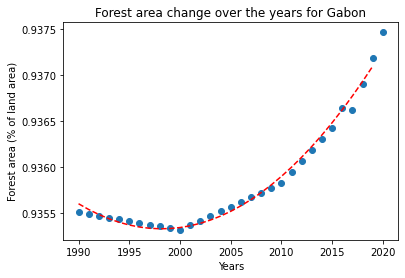

In [39]:
import numpy as np
from numpy import sin
from numpy import sqrt

gabon_df = z_melted[z_melted["Country Name"]=="Gabon"]
#finland_df = z_melted[z_melted["Country Name"].isin(["Finland","Papua New Guinea","American Samoa"])]
gabon_df['Year'] = pd.to_numeric(gabon_df["Year"])
# objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

x = gabon_df["Year"]
y = gabon_df["Value"] 

# curve fit
popg, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b,c = popg
# plot input vs output
plt.scatter(x, y)
# sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# the output for the range
y_line = objective(x_line, a, b,c)
# a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.title("Forest area change over the years for Gabon")
plt.xlabel("Years")
plt.ylabel("Forest area (% of land area)")
plt.savefig('gabon.jpg')
plt.show()